# Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf 


# Loading the Dataset

In [ ]:
cd=pd.read_excel('Concrete_Data.xls')

In [3]:
cd.head()

In [4]:
cd.nunique()

# Seeing the Size of Dataset

In [5]:
cd.shape

(1030, 9)

# Checking for the Nulls in Dataset

In [6]:
cd.isnull().sum()

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64

In [7]:
cd.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

# Renaming the Columns names

In [8]:
cd.columns =['Cement','Blast_Furnace_Slag','Fly_Ash','Water',
       'Superplasticizer','Coarse_Aggregate','Fine_Aggregate', 'Age',
       'Concrete_compressive_strength']

In [9]:
cd.head()

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age,Concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


# Doing EDA Task

In [10]:
cd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
Cement                           1030 non-null float64
Blast_Furnace_Slag               1030 non-null float64
Fly_Ash                          1030 non-null float64
Water                            1030 non-null float64
Superplasticizer                 1030 non-null float64
Coarse_Aggregate                 1030 non-null float64
Fine_Aggregate                   1030 non-null float64
Age                              1030 non-null int64
Concrete_compressive_strength    1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [11]:
cd.describe().T

,count,mean,std,min,25%,50%,75%,max
Cement,1030.0,281.165631,104.507142,102.000000,192.375000,272.900000,350.000000,540.000000
Blast_Furnace_Slag,1030.0,73.895485,86.279104,0.000000,0.000000,22.000000,142.950000,359.400000
Fly_Ash,1030.0,54.187136,63.996469,0.000000,0.000000,0.000000,118.270000,200.100000
Water,1030.0,181.566359,21.355567,121.750000,164.900000,185.000000,192.000000,247.000000
Superplasticizer,1030.0,6.203112,5.973492,0.000000,0.000000,6.350000,10.160000,32.200000
Coarse_Aggregate,1030.0,972.918592,77.753818,801.000000,932.000000,968.000000,1029.400000,1145.000000
Fine_Aggregate,1030.0,773.578883,80.175427,594.000000,730.950000,779.510000,824.000000,992.600000
Age,1030.0,45.662136,63.169912,1.000000,7.000000,28.000000,56.000000,365.000000
Concrete_compressive_strength,1030.0,35.817836,16.705679,2.331808,23.707115,34.442774,46.136287,82.599225


In [12]:
cd.corr()

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age,Concrete_compressive_strength
Cement,1.000000,-0.275193,-0.397475,-0.081544,0.092771,-0.109356,-0.222720,0.081947,0.497833
Blast_Furnace_Slag,-0.275193,1.000000,-0.323569,0.107286,0.043376,-0.283998,-0.281593,-0.044246,0.134824
Fly_Ash,-0.397475,-0.323569,1.000000,-0.257044,0.377340,-0.009977,0.079076,-0.154370,-0.105753
Water,-0.081544,0.107286,-0.257044,1.000000,-0.657464,-0.182312,-0.450635,0.277604,-0.289613
Superplasticizer,0.092771,0.043376,0.377340,-0.657464,1.000000,-0.266303,0.222501,-0.192717,0.366102
Coarse_Aggregate,-0.109356,-0.283998,-0.009977,-0.182312,-0.266303,1.000000,-0.178506,-0.003016,-0.164928
Fine_Aggregate,-0.222720,-0.281593,0.079076,-0.450635,0.222501,-0.178506,1.000000,-0.156094,-0.167249
Age,0.081947,-0.044246,-0.154370,0.277604,-0.192717,-0.003016,-0.156094,1.000000,0.328877
Concrete_compressive_strength,0.497833,0.134824,-0.105753,-0.289613,0.366102,-0.164928,-0.167249,0.328877,1.000000


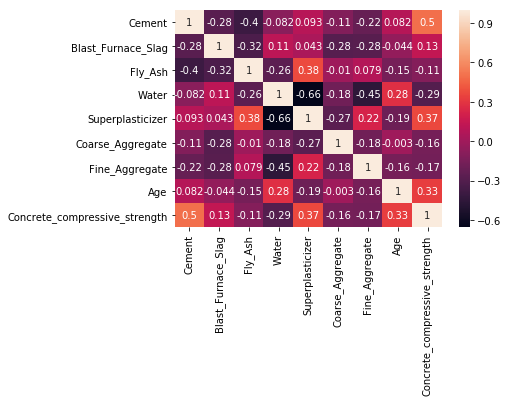

In [13]:
sns.heatmap(cd.corr(), annot=True)

# Checking for the Outlier

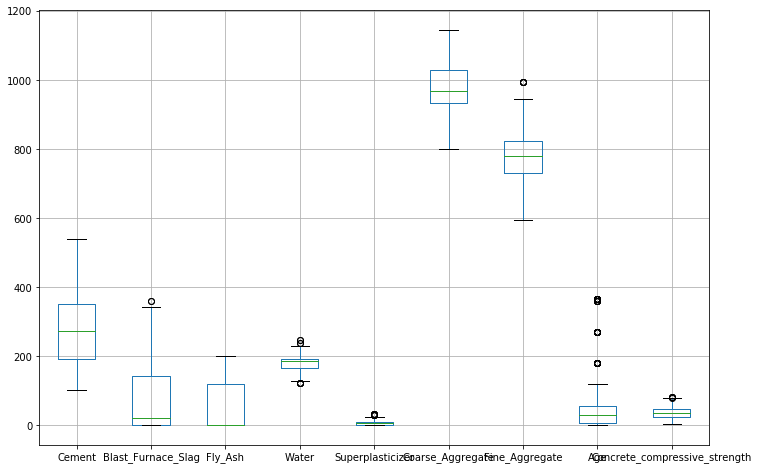

In [14]:
plt.figure(figsize=(12,8))
cd.boxplot()

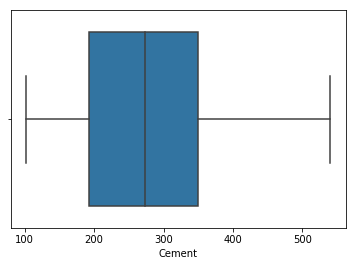

In [15]:
sns.boxplot(cd['Cement'])

In [16]:
cd.Cement.describe()

count    1030.000000
mean      281.165631
std       104.507142
min       102.000000
25%       192.375000
50%       272.900000
75%       350.000000
max       540.000000
Name: Cement, dtype: float64

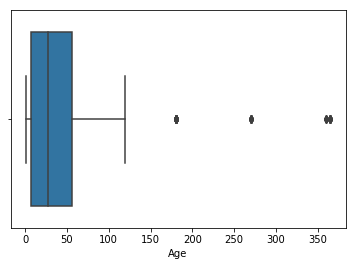

In [17]:
sns.boxplot(cd['Age'])

In [18]:
cd.Age.describe()

count    1030.000000
mean       45.662136
std        63.169912
min         1.000000
25%         7.000000
50%        28.000000
75%        56.000000
max       365.000000
Name: Age, dtype: float64

# Seeing the percentage of outlier in data.

In [19]:
cd[cd['Age']>150].shape

(59, 9)

##### As we see their is 6% of outlier in the dataset and we drooped them.

In [20]:
cd = cd[cd['Age']<150]

#### Made a new data without outliers.

In [21]:
cd.shape

(971, 9)

# Splitting the Data

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics

In [23]:
X=cd.drop(['Concrete_compressive_strength'], axis=1)
y=cd['Concrete_compressive_strength']

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=88,test_size=0.3)
model = LinearRegression()
model.fit(X_train, y_train)
y_predict1 = model.predict(X_test)

In [25]:
from sklearn import metrics
print('RMSE : ',np.sqrt(mean_squared_error(y_test,y_predict1)))
print('R-squared : ',metrics.r2_score(y_test,y_predict1))

RMSE :  7.867113220977175
R-squared :  0.7829592590314096


# Checking with other Algorithms for better accuracy

In [28]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier, VotingClassifier, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.metrics import accuracy_score, silhouette_score, cohen_kappa_score

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=88,test_size=0.3)
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
y_predict1 = model.predict(X_test)
print('RMSE : ',np.sqrt(mean_squared_error(y_test,y_predict1)))
print('R-squared : ',metrics.r2_score(y_test,y_predict1))

RMSE :  6.690159719580159
R-squared :  0.8430420077092359


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=88,test_size=0.3)
model = RandomForestRegressor()
model.fit(X_train, y_train)
y_predict1 = model.predict(X_test)
print('RMSE : ',np.sqrt(mean_squared_error(y_test,y_predict1)))
print('R-squared : ',metrics.r2_score(y_test,y_predict1))

RMSE :  4.803786693540944
R-squared :  0.9190758973708042


C:\Users\VISHAL\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=88,test_size=0.3)
model = GradientBoostingRegressor()
model.fit(X_train, y_train)
y_predict1 = model.predict(X_test)
print('RMSE : ',np.sqrt(mean_squared_error(y_test,y_predict1)))
print('R-squared : ',metrics.r2_score(y_test,y_predict1))

RMSE :  4.7450191006948055
R-squared :  0.9210437719940898


In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=88,test_size=0.3)
model = AdaBoostRegressor()
model.fit(X_train, y_train)
y_predict1 = model.predict(X_test)
print('RMSE : ',np.sqrt(mean_squared_error(y_test,y_predict1)))
print('R-squared : ',metrics.r2_score(y_test,y_predict1))

RMSE :  7.415401838592314
R-squared :  0.8071676725486377
